## ***Preprocessing***



In [ ]:
data = pd.read_csv('/kaggle/input/amazon-reviews/train.csv')

# First Phase : EDA

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.head()

## as we see the column names are consiedred as rows so we will convert them to rows and handling the columns name

In [ ]:
data=pd.DataFrame(np.vstack([data.columns, data]))
data.columns = ['Polarity', 'Title', 'Review']
print(data.shape)
data.head()

## after the previous step  the value of index 0 at 'Polarity' column will be be considered as object so we should handle it

In [ ]:
data['Polarity'] = data['Polarity'].astype(int)

In [ ]:
data.info()

In [ ]:
data = data[['Polarity', 'Review']].reset_index(drop=True)
data.head(15)

In [ ]:
# in this case the same review with same class is repeated
data.duplicated().sum()

# we will drop all duplicates

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

In [ ]:
data.shape

## in the below case the same review may have <span style="background:yellow" >different class</span> and this will distract the model *so we will remove the redundant row and the original from the data then we will annotate it* and then we will merge it to the original dataset

In [ ]:
data["Review"].duplicated().sum()

In [ ]:
data["Review"].drop_duplicates(keep=False,inplace=True)
data.shape

In [ ]:
duplicated_data=data[data["Review"].duplicated(keep=False)]
duplicated_data

# the duplicated data with human annotation

In [ ]:
unique_data=pd.read_csv('/kaggle/input/unique/data.csv')
unique_data.shape

In [ ]:
unique_data.head()

In [ ]:
data=pd.DataFrame(np.vstack([unique_data, data]))
data.columns = ['Polarity', 'Review']
data.head()

# the column 'Polarity' will be as object 

In [ ]:
data.info()

In [ ]:
data['Polarity'] = data['Polarity'].astype(int)

## check the target class whether <span style="background: yellow">Balanced or Not</span>

In [ ]:
value_counts=data.Polarity.value_counts()
value_counts

In [ ]:
value_counts.plot(kind="bar",x=value_counts.keys,colormap='viridis')

## check null values

In [ ]:
# Count the null values
data.isnull().sum()

No null values

In [ ]:
data.info()

# Second Pahse: Cleaning Phase

In [ ]:
## this function is for loweringcase all the words
def lower(text):
    ## we want to split the words of the sentence by split() to work with each word individually
    words = text.split()
    ## we created a new list to save all the lowercase words and we converted it by lower() method
    lower = [word.lower() for word in words]
    ## after finishing we join them back by join() method
    return ' '.join(lower)
## applying the function on the feature Review
data['Review']= data['Review'].apply(lambda x:lower(x))
data.head()

In [ ]:
## this function is for removing hyperlinks
def hyperlinks(text):
    ## this pattern follows any url
    pattern = r'http\S+|www\S+'
    ## re.sub() is used for substituting all the links with spaces
    removed = re.sub(pattern, '', text)
    return removed
## applying the function on the feature Review
data['Review']= data['Review'].apply(lambda x:hyperlinks(x))

In [ ]:
## defining a function for removing tabs between words
def remove_large_spaces(text):
    ## this pattern is for tabs
    pattern = r'\s+'
    # Remove tabs using regex substitution with spaces
    removed_spaces = re.sub(pattern, ' ', text)
    ## the strip method is used to remove any leading spaces after substitution
    return removed_spaces.strip()
data['Review']= data['Review'].apply(lambda x:remove_large_spaces(x))

In [ ]:
# show th stopwords
stopword = nltk.corpus.stopwords.words('english')
print(stopword)

In [ ]:
# defining a function to remove stopwords
def remove_stopwords(text):
    # checking if the word in the sentences contain stop words or not and save it
    text=' '.join([word for word in text.split() if word not in stopword])
    return text
data['Review'] = data['Review'].apply(lambda x: remove_stopwords(x))

In [ ]:
#we'll import string library as it already contains pre-defined punctuations
import string
string.punctuation
#defining the function to remove punctuations
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the punctuation-free text
data['Review']= data['Review'].apply(lambda x:remove_punctuation(x))

In [ ]:
## definig a function to remove non word characters
def remove_non_word_characters(sentence):
    # Regex pattern to match non-word characters
    pattern = r'\W+'
    # Remove non-word characters using regex substitution with spaces
    cleaned_sentence = re.sub(pattern, ' ', sentence)
    return cleaned_sentence
data['Review'] = data['Review'].apply(remove_non_word_characters)

In [ ]:
## this function is for removing the numbers in text data
def remove_numbers(text):
    ## this pattern in special for numbers
    pattern = r'\d+'
    # Remove numbers using regex substitution with spaces
    removed_numbers = re.sub(pattern, '', text)
    return removed_numbers
data['Review']= data['Review'].apply(lambda x:remove_numbers(x))

In [ ]:
## this function as for removing any html tag
def remove_html(text):
    html_re = re.compile(r'<.*?>')
    # create regex for html tag
    text = re.sub(html_re, '', text)
    return text
data['Review']= data['Review'].apply(lambda x:remove_html(x))

In [ ]:
## this function is for removing date and time from the texts
def remove_date_time(text):
    # this patterns match date and time formats
    # Matches MM/DD/YYYY or MM/DD/YY
    date_pattern = r"\d{1,2}/\d{1,2}/\d{2,4}"
     # Matches HH:MM or HH:MMAM/HH:MMPM
    time_pattern = r"\d{1,2}:\d{2}([AP]M)?"
    # Remove date and time patterns from the text
    text_without_date = re.sub(date_pattern, "", text)
    text_without_date_time = re.sub(time_pattern, "", text_without_date)
    return text_without_date_time
data['Review']= data['Review'].apply(lambda x:remove_date_time(x))

In [ ]:
## this function is for removing mentions and hashtags from the texts
def remove_mentions_hashtags(text):
    # Remove mentions
    text_without_mentions = re.sub(r"@\w+", "", text)
    # Remove hashtags
    text_without_mentions_hashtags = re.sub(r"#\w+", "", text_without_mentions)
    return text_without_mentions_hashtags
data['Review']= data['Review'].apply(lambda x:remove_mentions_hashtags(x))

In [ ]:
data['Review'] = data['Review'].apply(lambda x: nltk.word_tokenize(x))

data.head()

In [ ]:
data.head()

## save the cleaned data

In [ ]:
# data.to_csv('final_cleaned_data.zip', index=False, compression=dict(method='zip', archive_name='final_cleaned_data.csv'))

## end of final cleaning

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential                # 'Sequential' model will be used for training.
from sklearn.model_selection import train_test_split          # 'train_test_split' for splitting the data into train and test data. 
from tensorflow.keras.preprocessing.text import Tokenizer       
from tensorflow.keras.preprocessing.sequence import pad_sequences       # 'pad_sequences' for having same dimmension for each sequence.
from tensorflow.keras.layers import Embedding,Bidirectional,GlobalMaxPool1D, LSTM, Flatten,Dense,Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam
from keras.initializers import GlorotUniform
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: explainable-ai-sdk, tensorflow-cloud, tensorflow-decision-forests, tensorflow-serving-api, tensorflow-text, tensorflowjs, witwidget


In [4]:
# to read the cleaned data 
import pandas as pd
data=pd.read_csv('/kaggle/input/final-cleaned-data/cleaned_data_final.csv')
data.head()

,Polarity,Review
0,2,"['i', 'too', 'purchased', 'cd', 'player', 'yea..."
1,2,"['things', 'review', 'say', 'yep', 'nope', 'i'..."
2,1,"['think', 'stupid', 'write', 'words', 'rate', ..."
3,2,"['great', 'book', 'great', 'series', 'great', ..."
4,1,"['ratings', 'assign', 'movie', 'based', 'envir..."


In [5]:
subset_data=data.sample(frac=.9,ignore_index=True)
subset_data["Polarity"].value_counts()

Polarity
2    1619198
1    1616178
Name: count, dtype: int64

conversion the classess to 1 and 0 as the model behave well by set the class like this

In [6]:
conversion = {1:0,2:1}
subset_data["Polarity"]=subset_data["Polarity"].map(conversion)

In [7]:
subset_data.Polarity.value_counts()

Polarity
1    1619198
0    1616178
Name: count, dtype: int64

## Note : the type of Review is object but the value itself is <span  style="background:yellow">STR</span> and we need to convert it to  LIST  that contains values each of it is STR

In [8]:
subset_data["Review"][0]

"['pure', 'simply', 'biggest', 'waste', 'time', 'past', 'month', 'funny', 'all', 'bother']"

In [9]:
import ast
subset_data["Review"]=subset_data["Review"].apply(lambda x : ast.literal_eval(x))
type(subset_data["Review"][0])

list

# create a matrix for each word

In [10]:
subset_data["Review"]=subset_data["Review"].apply(lambda x : ' '.join(x))
subset_data.head()

,Polarity,Review
0,0,pure simply biggest waste time past month funn...
1,1,truely fun novel beginning hope great fantasy ...
2,1,back day song quite popular great dance to use...
3,1,fortunate enough use textbook university south...
4,0,camera work pretty decent soundtrack worked we...


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(subset_data["Review"], subset_data.Polarity, test_size = 0.2,shuffle=True ,random_state = 42) 
X_train.head()

941352     movied vhs taped television back s saw amazon ...
250445     suspicious brand new copy going dollar listene...
1779062    book read lowlevel interest information warfar...
2792972    book probably ideal starting text read cunning...
1348838    cd everything greatest songs movie money shots...
Name: Review, dtype: object

we will set the tokenizer to have 10000 words

In [12]:
tokenizer = Tokenizer(num_words = 10000)

tokenizer.fit_on_texts(subset_data["Review"])
# tokenizer.fit_on_texts(data["Review"])
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index)+1


## we will use here <span style='background:yellow'>word2vec pre trained model</span>

In [13]:
import gensim
word_model = gensim.models.KeyedVectors.load_word2vec_format('/kaggle/input/googlenewsvectors/GoogleNews-vectors-negative300.bin', binary=True)

In [14]:
import numpy as np
embedding_matrix=np.zeros((vocab_size,300))
for word, index in tokenizer.word_index.items():
    try:
        embedding_matrix[index] = word_model[word]
    except KeyError:
        embedding_matrix[index]=[0] *300
        

In [15]:
X_train=pad_sequences(X_train, maxlen=90,padding='post',truncating='post')
X_test=pad_sequences(X_test, maxlen=90,padding='post',truncating='post')

# BI LSTM model

In [16]:
model= Sequential()
model.add(Embedding(input_dim=vocab_size,weights=[embedding_matrix] ,
                    output_dim=300,input_length=90,trainable=True))
# model.add(LSTM(units=128 ,activation='relu',return_sequences=True)) 

# model.add(LSTM(units=64 ,activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))
# --------------------------------

# model.add(Bidirectional(LSTM(64, dropout=0.25, recurrent_dropout=0.1)))
# model.add(Dense(10))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))
# -------------------------
model.add(Bidirectional(LSTM(128,return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.05)) # -------->> to be edited 
model.add(Dense(1, activation="sigmoid"))


# Compile the model
model.compile(optimizer=Adam(lr=.001), loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 90, 300)           577074600 
                                                                 
 bidirectional (Bidirection  (None, 90, 256)           439296    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 577514153 (2.15 GB)
Trainable params: 5775

In [17]:
model.fit(X_train, Y_train, epochs=3,batch_size=64 ,validation_split=0.2)

Epoch 1/3
32354/32354 [==============================] - 2358s 73ms/step - loss: 0.2515 - accuracy: 0.8955 - precision: 0.8945 - recall: 0.8971 - auc: 0.9614 - val_loss: 0.2275 - val_accuracy: 0.9071 - val_precision: 0.9002 - val_recall: 0.9159 - val_auc: 0.9685
Epoch 2/3
32354/32354 [==============================] - 2255s 70ms/step - loss: 0.2100 - accuracy: 0.9154 - precision: 0.9144 - recall: 0.9167 - auc: 0.9729 - val_loss: 0.2201 - val_accuracy: 0.9108 - val_precision: 0.9055 - val_recall: 0.9174 - val_auc: 0.9704
Epoch 3/3
32354/32354 [==============================] - 2241s 69ms/step - loss: 0.1901 - accuracy: 0.9246 - precision: 0.9237 - recall: 0.9259 - auc: 0.9777 - val_loss: 0.2222 - val_accuracy: 0.9110 - val_precision: 0.9104 - val_recall: 0.9119 - val_auc: 0.9701


In [40]:
evaluation_results = model.evaluate(X_test, Y_test)

# Print evaluation results
for metric_name, metric_value in zip(model.metrics_names, evaluation_results):
    print(f'{metric_name}: {metric_value}')

20222/20222 [==============================] - 141s 7ms/step - loss: 0.2216 - accuracy: 0.9106 - precision: 0.9098 - recall: 0.9115 - auc: 0.9702
loss: 0.22161734104156494
accuracy: 0.9106117486953735
precision: 0.9098489284515381
recall: 0.9115000367164612
auc: 0.9701971411705017


# ****Confusion matrix****

In [38]:
from sklearn.metrics import confusion_matrix

predicted_probs = model.predict(X_test) # it will return probabilities 

# Convert probabilities to class labels
predicted_labels=np.array(list(map(lambda x: 1 if x > 0.5 else 0, predicted_probs)))
# Compute confusion matrix
cm = confusion_matrix(Y_test, predicted_labels)
print('Confusion Matrix:')
print(cm)

20222/20222 [==============================] - 105s 5ms/step
Confusion Matrix:
[[294393  29214]
 [ 28627 294842]]


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

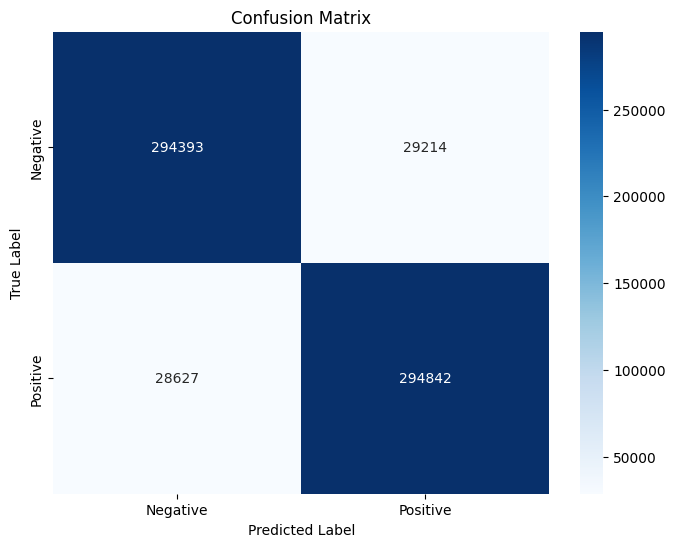

In [52]:
import matplotlib.pyplot  as plt

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## ***work on the predictive analysis***

In [ ]:
import pandas as pd

In [19]:
cloth_data=pd.read_csv('/kaggle/input/consumer-review-of-clothing-product/Consumer Review of Clothing Product/data_amazon.xlsx - Sheet1.csv')

In [20]:
cloth_data

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
49333,Dress felt and fit great. I got lots of compl...,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,0.0,0.0,1.0,0.0,0.0
49334,Loved the dress but poor quality,This dress looked great and I loved the materi...,2.0,Dresses,1.0,0.0,0.0,0.0,1.0
49335,"Cute dress, didn't fit",Wanted this dress to work it didn't. It is ver...,1.0,Dresses,0.0,1.0,0.0,0.0,0.0
49336,Very cute!,No complaints othe than the zipper gets stuck ...,4.0,Dresses,0.0,0.0,0.0,0.0,1.0


In [21]:
cloth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45370 non-null  object 
 1   Review        48507 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


## checking nulls

In [22]:
print(cloth_data.isnull().sum())
print('as we see that in the last 5 columns there is more than ',round(43000/49339,2) ,'% missed , so that we will neglect these columns')

Title            3968
Review            831
Cons_rating       214
Cloth_class        16
Materials       43597
Construction    43595
Color           43596
Finishing       43601
Durability      43604
dtype: int64
as we see that in the last 5 columns there is more than  0.87 % missed , so that we will neglect these columns


In [21]:
cloth_data.drop(['Construction','Color','Materials','Finishing','Durability'], axis=1, inplace=True)
cloth_data.shape

(49338, 4)

the title column we won't use it as there is ite alternative 'Review'

In [22]:
cloth_data.drop(['Title'], axis=1, inplace=True)
cloth_data.shape

(49338, 3)

## imputing nulls

In [25]:
cloth_data.isnull().sum()

Review         831
Cons_rating    214
Cloth_class     16
dtype: int64

delete the nulls from the column Review

In [23]:
cloth_data.dropna(subset=['Review'],inplace=True)
cloth_data.isnull().sum()

Review           0
Cons_rating    212
Cloth_class     13
dtype: int64

fill the column Cons_rating with median (to avoid the outliers problem)

In [24]:
cloth_data['Cons_rating'].fillna(cloth_data['Cons_rating'].median(),inplace=True)
cloth_data.isnull().sum()

Review          0
Cons_rating     0
Cloth_class    13
dtype: int64

fill the column Cloth_class with mode (as it's a categorical column)

In [25]:
cloth_data['Cloth_class'].fillna(cloth_data['Cloth_class'].mode()[0],inplace=True)
cloth_data.isnull().sum()

Review         0
Cons_rating    0
Cloth_class    0
dtype: int64

In [26]:
cloth_data

,Review,Cons_rating,Cloth_class
0,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates
1,Love this dress! it's sooo pretty. i happene...,5.0,Dresses
2,I had such high hopes for this dress and reall...,3.0,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants
4,This shirt is very flattering to all due to th...,5.0,Blouses
...,...,...,...
49333,Loved the color!!! Dress fit great and I got ...,5.0,Dresses
49334,This dress looked great and I loved the materi...,2.0,Dresses
49335,Wanted this dress to work it didn't. It is ver...,1.0,Dresses
49336,No complaints othe than the zipper gets stuck ...,4.0,Dresses


* # checking duplicates

In [ ]:
cloth_data.duplicated().sum()

In [27]:
cloth_data.drop_duplicates(inplace=True)
cloth_data.duplicated().sum()

0

In [31]:
cloth_data.describe()

,Cons_rating
count,48507.000000
mean,4.096646
std,1.286192
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


* # analysis phase

In [41]:
import plotly.express as px

cloth_class_counts = cloth_data['Cloth_class'].value_counts().reset_index()
cloth_class_counts.columns = ['Cloth_class', 'Count']

# Create a bar plot using Plotly
fig = px.bar(cloth_class_counts, x='Cloth_class', y='Count', title='Distribution of Cloth Classes', 
             color='Cloth_class', labels={'Cloth_class': 'Cloth Class', 'Count': 'Count'})
fig.show()

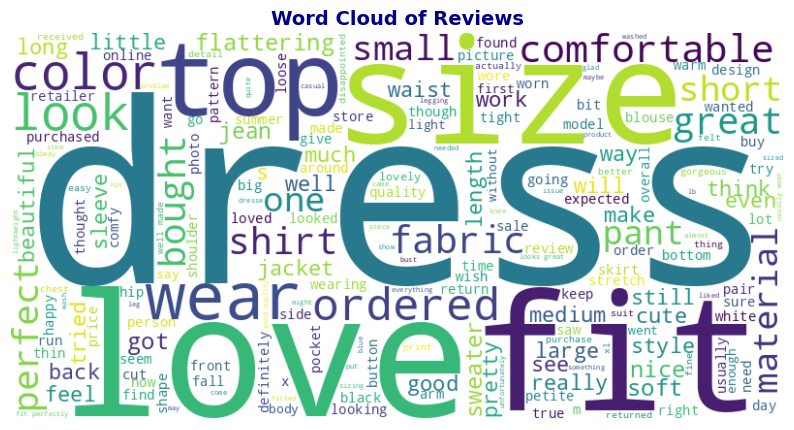

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cloth_data['Review']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews', fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.axis('off')
plt.show()

# clean the Review Column & add the classification of the text to the data as a new column

In [29]:
import nltk
import numpy as np
import string
import re
import ast
from tensorflow.keras.preprocessing.text import Tokenizer       
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
stopword = nltk.corpus.stopwords.words('english')

In [28]:
def lower(text):
    ## we want to split the words of the sentence by split() to work with each word individually
    words = text.split()
    ## we created a new list to save all the lowercase words and we converted it by lower() method
    lower = [word.lower() for word in words]
    ## after finishing we join them back by join() method
    return ' '.join(lower)


def hyperlinks(text):
    ## this pattern follows any url
    pattern = r'http\S+|www\S+'
    ## re.sub() is used for substituting all the links with spaces
    removed = re.sub(pattern, '', text)
    return removed

def remove_large_spaces(text):
    ## this pattern is for tabs
    pattern = r'\s+'
    # Remove tabs using regex substitution with spaces
    removed_spaces = re.sub(pattern, ' ', text)
    ## the strip method is used to remove any leading spaces after substitution
    return removed_spaces.strip()

def remove_stopwords(text):
    # checking if the word in the sentences contain stop words or not and save it
    stopword = nltk.corpus.stopwords.words('english')
    text=' '.join([word for word in text.split() if word not in stopword])
    return text

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def remove_non_word_characters(sentence):
    # Regex pattern to match non-word characters
    pattern = r'\W+'
    # Remove non-word characters using regex substitution with spaces
    cleaned_sentence = re.sub(pattern, ' ', sentence)
    return cleaned_sentence

def remove_numbers(text):
    ## this pattern in special for numbers
    pattern = r'\d+'
    # Remove numbers using regex substitution with spaces
    removed_numbers = re.sub(pattern, '', text)
    return removed_numbers

def remove_html(text):
    html_re = re.compile(r'<.*?>')
    # create regex for html tag
    text = re.sub(html_re, '', text)
    return text

def remove_date_time(text):
    # this patterns match date and time formats
    # Matches MM/DD/YYYY or MM/DD/YY
    date_pattern = r"\d{1,2}/\d{1,2}/\d{2,4}"
     # Matches HH:MM or HH:MMAM/HH:MMPM
    time_pattern = r"\d{1,2}:\d{2}([AP]M)?"
    # Remove date and time patterns from the text
    text_without_date = re.sub(date_pattern, "", text)
    text_without_date_time = re.sub(time_pattern, "", text_without_date)
    return text_without_date_time

def remove_mentions_hashtags(text):
    # Remove mentions
    text_without_mentions = re.sub(r"@\w+", "", text)
    # Remove hashtags
    text_without_mentions_hashtags = re.sub(r"#\w+", "", text_without_mentions)
    return text_without_mentions_hashtags

In [30]:
functions=[lower ,hyperlinks ,remove_large_spaces , remove_stopwords , remove_punctuation ,
           remove_non_word_characters , remove_numbers , remove_html , remove_date_time ,
           remove_mentions_hashtags ]
def cleaned_tokenized(x):
    result = x
    for func in functions:
        result = func(result)
        
    result= nltk.word_tokenize(result)
    

    result=' '.join(result) # to combine the tokens to be a sentence
      
    
    return result

In [31]:
cleaned_reviews = cloth_data['Review'].apply(lambda x: cleaned_tokenized(x))
cleaned_reviews

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hopes dress really wanted work me initial...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
49333    loved color dress fit great got lot compliment...
49334    dress looked great loved material unfortunatel...
49335    wanted dress work didnt cute didnt finish zipp...
49336      complaints othe zipper gets stuck way n mess it
49337                fabric really nice im l fit perfectly
Name: Review, Length: 48020, dtype: object

In [32]:
cleaned_reviews=tokenizer.texts_to_sequences(cleaned_reviews)

cleaned_reviews = pad_sequences(cleaned_reviews, maxlen=90,padding='post',truncating='post')

cleaned_reviews = model.predict(cleaned_reviews)

cleaned_reviews = np.where(cleaned_reviews > 0.5, 1, 0)


1501/1501 [==============================] - 9s 5ms/step


In [36]:
cloth_data['polarity'] = cleaned_reviews

cloth_data

,Review,Cons_rating,Cloth_class,polarity
0,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,1
1,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,1
2,I had such high hopes for this dress and reall...,3.0,Dresses,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,1
4,This shirt is very flattering to all due to th...,5.0,Blouses,1
...,...,...,...,...
49333,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,1
49334,This dress looked great and I loved the materi...,2.0,Dresses,0
49335,Wanted this dress to work it didn't. It is ver...,1.0,Dresses,0
49336,No complaints othe than the zipper gets stuck ...,4.0,Dresses,0


## ***saveing the new dataset***

In [37]:
cloth_data.to_csv('after polarity.csv', index=False)

# label encoding for the Cloth_class

In [43]:
cloth_data

,Review,Cons_rating,Cloth_class,polarity
0,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,1
1,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,1
2,I had such high hopes for this dress and reall...,3.0,Dresses,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,1
4,This shirt is very flattering to all due to th...,5.0,Blouses,1
...,...,...,...,...
49333,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,1
49334,This dress looked great and I loved the materi...,2.0,Dresses,0
49335,Wanted this dress to work it didn't. It is ver...,1.0,Dresses,0
49336,No complaints othe than the zipper gets stuck ...,4.0,Dresses,0


****as we see that the categories : Dress , Chemises , Casual bottoms --> have low frequenceis and we will remove it , to avoid dimensionalty of reduction****

In [44]:
cloth_data['Cloth_class'].value_counts()

Cloth_class
Dresses           8427
Blouses           5275
Knits             4625
Sweaters          3802
Jeans             3781
Pants             3629
Jackets           3170
Shorts            3071
Sleep             2909
Shirts            2543
Blazer            1617
Suits             1313
Fine gauge        1059
Skirts             903
Lounge             668
Swim               330
Outerwear          319
Legwear            158
Intimates          147
Layering           132
Trend              118
Dress               22
Chemises             1
Casual bottoms       1
Name: count, dtype: int64

In [45]:
cloth_data=cloth_data[(cloth_data['Cloth_class'] != 'Dress') & (cloth_data['Cloth_class'] != 'Casual bottoms') & (cloth_data['Cloth_class'] != 'Chemises')]
cloth_data

,Review,Cons_rating,Cloth_class,polarity
0,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,1
1,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,1
2,I had such high hopes for this dress and reall...,3.0,Dresses,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,1
4,This shirt is very flattering to all due to th...,5.0,Blouses,1
...,...,...,...,...
49333,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,1
49334,This dress looked great and I loved the materi...,2.0,Dresses,0
49335,Wanted this dress to work it didn't. It is ver...,1.0,Dresses,0
49336,No complaints othe than the zipper gets stuck ...,4.0,Dresses,0


## we ****will not **** use label encoding as there isn't oreder in the categories of the column Cloth_class ,  as it may produce bias and give a certain class more attention than another 

## so we will use one-hot encoding 

In [46]:
one_hot_df = pd.get_dummies(cloth_data, columns=['Cloth_class'])
one_hot_df


,Review,Cons_rating,polarity,Cloth_class_Blazer,Cloth_class_Blouses,Cloth_class_Dresses,Cloth_class_Fine gauge,Cloth_class_Intimates,Cloth_class_Jackets,Cloth_class_Jeans,...,Cloth_class_Outerwear,Cloth_class_Pants,Cloth_class_Shirts,Cloth_class_Shorts,Cloth_class_Skirts,Cloth_class_Sleep,Cloth_class_Suits,Cloth_class_Sweaters,Cloth_class_Swim,Cloth_class_Trend
0,Absolutely wonderful - silky and sexy and comf...,4.0,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Love this dress! it's sooo pretty. i happene...,5.0,1,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,I had such high hopes for this dress and reall...,3.0,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,This shirt is very flattering to all due to th...,5.0,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49333,Loved the color!!! Dress fit great and I got ...,5.0,1,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49334,This dress looked great and I loved the materi...,2.0,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49335,Wanted this dress to work it didn't. It is ver...,1.0,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49336,No complaints othe than the zipper gets stuck ...,4.0,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47996 entries, 0 to 49337
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Review                  47996 non-null  object 
 1   Cons_rating             47996 non-null  float64
 2   polarity                47996 non-null  int64  
 3   Cloth_class_Blazer      47996 non-null  bool   
 4   Cloth_class_Blouses     47996 non-null  bool   
 5   Cloth_class_Dresses     47996 non-null  bool   
 6   Cloth_class_Fine gauge  47996 non-null  bool   
 7   Cloth_class_Intimates   47996 non-null  bool   
 8   Cloth_class_Jackets     47996 non-null  bool   
 9   Cloth_class_Jeans       47996 non-null  bool   
 10  Cloth_class_Knits       47996 non-null  bool   
 11  Cloth_class_Layering    47996 non-null  bool   
 12  Cloth_class_Legwear     47996 non-null  bool   
 13  Cloth_class_Lounge      47996 non-null  bool   
 14  Cloth_class_Outerwear   47996 non-null  boo

* # ***predictive model***

In [48]:
X = one_hot_df.drop(columns=['Cons_rating','Review'])
y = one_hot_df['Cons_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* ## using RandomForestClassifier 

In [49]:

# Model Training
from sklearn.ensemble import RandomForestClassifier

model_cloth = RandomForestClassifier(random_state=42)
model_cloth.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

RandomForestClassifier(random_state=42)

In [50]:
# Model Evaluation
from sklearn.metrics import classification_report, accuracy_score

y_pred = model_cloth.predict(X_test)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

         1.0       0.31      0.50      0.38       768
         2.0       0.00      0.00      0.00       672
         3.0       0.29      0.41      0.34      1013
         4.0       0.20      0.00      0.00      1595
         5.0       0.75      0.92      0.83      5552

    accuracy                           0.62      9600
   macro avg       0.31      0.37      0.31      9600
weighted avg       0.52      0.62      0.54      9600

Accuracy: 61.84%


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

* ## using svm 

In [51]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1.0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

Accuracy: 0.6184375


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp